In [1]:
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


from plyfile import PlyData, PlyElement
import numpy as np

In [2]:
init_notebook_mode(connected=True)

In [3]:
# mesh
# points = mesh.vertices()
# #norms = mesh.request_vertex_normals

# points=[v for v in mesh.vertices()]



# # for vh in mesh.vertices():
# #    45     print vh.idx()

### Gather the xyz points from the ply file

In [4]:
plydata = PlyData.read('../ply/cow2.ply')
nr_points=plydata.elements[0].count
nr_faces=plydata.elements[1].count
points=[plydata['vertex'][k] for k in range(nr_points)]
points=np.array(map(list, points))

points[:,2] -= 10 # -10 up the z axis
points = points
x,y,z=zip(*points)#

points 


array([[  0.60553801,   0.18312199, -10.47227764],
       [  0.64922303,   0.12970001, -10.49487495],
       [  0.60108203,   0.105512  , -10.53334332],
       ..., 
       [ -1.45577002,   0.67478901,  -9.75510216],
       [ -1.24478996,   0.64876801,  -9.79913616],
       [ -1.48925996,   0.64368999,  -9.77277374]], dtype=float32)

### Plot!

In [5]:

cowScat =Scatter3d(x=x,
                y=y,
                z=z,
                mode='markers',
                marker=dict(
                    size=2,
                    color=z,                # set color to an array/list of desired values
                    colorscale='Red',   # choose a colorscale
                    opacity=0.8)
               )

xMark =Scatter3d(x=[5],
            y=[0],
            z=[0],
            mode='markers',
            marker=dict(size=15,color='rgb(255,0,0)')#'#f44242')
           )

yMark =Scatter3d(x=[0],
            y=[5],
            z=[0],
            mode='markers',
            marker=dict(size=15,color='rgb(0,255,0)')
           )

zMark =Scatter3d(x=[0],
            y=[0],
            z=[-5],
            mode='markers',
            marker=dict(size=15,color='rgb(0,0,255)')
           )

        
axis=dict(showbackground=False,
          showline=True,  
          zeroline=True,
          showgrid=True,
          showticklabels=True,
          title='' 
          )

layout = Layout(title="PLY", 
                width=800,
                height=800,
                showlegend=False,
                scene=Scene(aspectmode='manual',
                            aspectratio=dict(x=1, y=1, z=1),
                            xaxis=dict(range=[-11, 11], title='x Axis'),
                            yaxis=dict(range=[-11, 11], title='y Axis'),
                            zaxis=dict(range=[-11, 11], title='z Axis'),

                            camera = dict(
                                up=dict(x=0, y=0, z=1),
                                center=dict(x=0, y=0, z=0),
                                eye=dict(x=0, y=0, z=2)
                            ),

                           ),
                margin=Margin(t=100),
                hovermode='closest',
                
                )


data=Data([cowScat,xMark,yMark,zMark])
fig=Figure(data=data, layout=layout)
plot(fig)

'file:///Users/gjdiaz/Documents/Code/Python/GazeToolbox/gazeinworld_demo-develop 2/projection/temp-plot.html'

### Make a projection matrix

In [6]:
fovy = 90.0 * (np.pi/180)
aspect = 1.0;
fovx = fovy * aspect;
nearDist = 0.1;
farDist = 20.0;

yScale = 1.0 / np.tan(fovy / 2);
xScale = yScale/aspect;
nearmfar = nearDist - farDist;

In [7]:
projMat_4x4 = np.zeros([4,4]);
projMat_4x4[0,0] = xScale
projMat_4x4[1,1] = yScale
projMat_4x4[2,2] = (farDist+nearDist) / (nearDist-farDist);
projMat_4x4[2,3] = -1.0;
projMat_4x4[3,2] = 2*(nearDist * farDist) / (nearDist-farDist)
projMat_4x4[3,3] = 1

projMat_4x4

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -1.01005025, -1.        ],
       [ 0.        ,  0.        , -0.20100503,  1.        ]])

### Add the W to XYZ (homogenous coordinates)

In [8]:
homVertices_vIdx_xyzw = [np.hstack([list(plydata['vertex'][k]),1.]) for k in range(nr_points)]

In [9]:
homVertices_vIdx_xyzw[0:5]

[array([ 0.60553801,  0.18312199, -0.472278  ,  1.        ]),
 array([ 0.64922303,  0.12970001, -0.49487501,  1.        ]),
 array([ 0.60108203,  0.105512  , -0.53334302,  1.        ]),
 array([ 0.69124502,  0.0569483 , -0.52476197,  1.        ]),
 array([ 0.652035  ,  0.0379582 , -0.54233199,  1.        ])]

### Project using matrix multiplication

In [10]:
def projectVertex(xyzw,projMatIn_4x4):
    dataOutXYZW = np.matmul( projMatIn_4x4,np.transpose(xyzw))
    dataOutXYZ = dataOutXYZW[0:3] / dataOutXYZW[3]
    return dataOutXYZ
    
projVertices_vIdx_xyzw = np.apply_along_axis(projectVertex,1,homVertices_vIdx_xyzw,projMat_4x4)

In [11]:
x2,y2,z2=zip(*projVertices_vIdx_xyzw[:,0:3])

### Plot!

In [12]:

projCowScat =Scatter3d(x=x2,
                y=y2,
                z=np.tile(-10,len(x2)),#z2,
                mode='markers',
                marker=dict(
                    size=1,
                    color='#f44242',                # set color to an array/list of desired values
                    opacity=0.8)
               )
                
xMark =Scatter3d(x=[5],
            y=[0],
            z=[0],
            mode='markers',
            marker=dict(size=15,color='#f44242')
           )

yMark =Scatter3d(x=[0],
            y=[5],
            z=[0],
            mode='markers',
            marker=dict(size=15,color='#50ed7a')
           )

zMark =Scatter3d(x=[0],
            y=[0],
            z=[-5],
            mode='markers',
            marker=dict(size=15,color='#3f52e2')
           )

        
axis=dict(showbackground=False,
          showline=True,  
          zeroline=True,
          showgrid=True,
          showticklabels=True,
          title='' 
          )

layout = Layout(title="PLY", 
                width=800,
                height=800,
                showlegend=False,
                scene=Scene(aspectmode='manual',
                            aspectratio=dict(x=1, y=1, z=1),
                            xaxis=dict(range=[-10, 10], title='x Axis'),
                            yaxis=dict(range=[-10, 10], title='y Axis'),
                            zaxis=dict(range=[-20,0], title='z Axis'),
                            camera = dict(
                                up=dict(x=1, y=0, z=0),
                                center=dict(x=0, y=0, z=0),
                                eye=dict(x=0, y=0, z=2)
                            ),

                           ),
                margin=Margin(t=100),
                hovermode='closest',
                
                )


data=Data([cowScat,projCowScat,xMark,yMark,zMark])
fig=Figure(data=data, layout=layout)
iplot(fig)


# Concave hull

In [13]:
cowPts_pt_xy = np.transpose([x2,y2])
np.shape(cowPts_pt_xy)

(2903, 2)

In [22]:
from shapely.ops import cascaded_union, polygonize
import shapely.geometry as geometry
from scipy.spatial import Delaunay
import numpy as np
import pylab as pl
from matplotlib.collections import LineCollection

def alpha_shape(points, alpha):
    if len(points) < 4:
        # When you have a triangle, there is no sense
        # in computing an alpha shape.
        return geometry.MultiPoint(list(points)).convex_hull
    
    def add_edge(edges, edge_points, coords, i, j):
        """
        Add a line between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
           # already added
           return
        edges.add( (i, j) )
        edge_points.append(coords[ [i, j] ])
    
    coords = np.array([point.coords[0]
                       for point in points])
    tri = Delaunay(coords)
    
    edges = set()
    edge_points = []
    
    # loop over triangles:
    # ia, ib, ic = indices of corner points of the
    # triangle
    for ia, ib, ic in tri.vertices:
        pa = coords[ia]
        pb = coords[ib]
        pc = coords[ic]
        # Lengths of sides of triangle
        a = np.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = np.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = np.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)
        # Semiperimeter of triangle
        s = (a + b + c)/2.0
        # Area of triangle by Heron's formula
        area = np.sqrt(s*(s-a)*(s-b)*(s-c))
        circum_r = a*b*c/(4.0*area)
        # Here's the radius filter.
        #print circum_r
        if circum_r < 1.0/alpha:
                add_edge(edges, edge_points, coords, ia, ib)
                add_edge(edges, edge_points, coords, ib, ic)
                add_edge(edges, edge_points, coords, ic, ia)
        m = geometry.MultiLineString(edge_points)
        triangles = list(polygonize(m))
        return cascaded_union(triangles), edge_points

thePoints =[]

for idx in range(len(x2)):
    thePoints.append(geometry.shape(geometry.Point(x2[idx],y2[idx])))
     #coords=map(float,line.split(" "))
     #print geometry.Point(coords[0],coords[1])
        
x = [p.x for p in thePoints]
y = [p.y for p in thePoints]


concave_hull, edge_points = alpha_shape(thePoints, alpha=0.001)
edge_points

[array([[-0.55135641,  0.76065199],
        [-1.31941305,  0.03015936]]), array([[-1.31941305,  0.03015936],
        [ 0.38436332,  0.20736379]]), array([[ 0.38436332,  0.20736379],
        [-0.55135641,  0.76065199]])]

In [23]:
cowPts_pt_xy[0][0]

0.55303797664010212

In [25]:
#!/usr/bin/python
import sys
import subprocess

hull_path = "./hull"
outFile = 'temp.txt'
cowPts_pt_xy = np.transpose([x2,y2])

def get_alpha_shape(pointsIn_pt_xy,radius):
    
    # Write to a text file
    f = open(outFile, "w")
    [f.write(str("%1.2f %1.2f\n"  % (pt[0], pt[1]))) for pt in pointsIn_pt_xy]
    f.close()

    command = "%s -A -aa %s -r -m10000000 -oN -oFpoints < %s" % (hull_path, str(radius), outFile)
    print sys.stderr, "Running command: %s" % command
    retcode = subprocess.call(command, shell=True)
    results_file = open("hout-alf")
    results_file.next()
    results_indices = [[int(i) for i in line.rstrip().split()] for line in results_file]
    results_file.close()
    return [(pointsIn_pt_xy[i], pointsIn_pt_xy[j]) for i,j in results_indices ]

radius=0.01
alpha = get_alpha_shape(cowPts_pt_xy,radius)

hull_points_xy = []
a = [np.array(x[0]) for x in alpha]
b = [np.array(x[1]) for x in alpha]
hull_points_xy = np.vstack([a,b])

<ipykernel.iostream.OutStream object at 0x110c2acd0> Running command: ./hull -A -aa 0.01 -r -m10000000 -oN -oFpoints < temp.txt


In [26]:
projCowHull =Scatter3d(x=hull_points_xy[:,0],
                y=hull_points_xy[:,1],
                z=np.tile(-10,len(hull_points_xy)),#z2,
                mode='lines',
                line=dict(
                    color='#1f77b4',
                    width=2)
               )
                
    
projCowScat =Scatter3d(x=x2,
                y=y2,
                z=np.tile(-10,len(x2)),#z2,
                mode='markers',
                marker=dict(
                    size=1,
                    color='#f44242',                # set color to an array/list of desired values
                    opacity=0.8)
               )
                
xMark =Scatter3d(x=[5],
            y=[0],
            z=[0],
            mode='markers',
            marker=dict(size=15,color='#f44242')
           )

yMark =Scatter3d(x=[0],
            y=[5],
            z=[0],
            mode='markers',
            marker=dict(size=15,color='#50ed7a')
           )

zMark =Scatter3d(x=[0],
            y=[0],
            z=[-5],
            mode='markers',
            marker=dict(size=15,color='#3f52e2')
           )

        
axis=dict(showbackground=False,
          showline=True,  
          zeroline=True,
          showgrid=True,
          showticklabels=True,
          title='' 
          )

layout = Layout(title="PLY", 
                width=800,
                height=800,
                showlegend=False,
                scene=Scene(aspectmode='manual',
                            aspectratio=dict(x=1, y=1, z=1),
                            xaxis=dict(range=[-10, 10], title='x Axis'),
                            yaxis=dict(range=[-10, 10], title='y Axis'),
                            zaxis=dict(range=[-20,0], title='z Axis'),
                            camera = dict(
                                up=dict(x=1, y=0, z=0),
                                center=dict(x=0, y=0, z=0),
                                eye=dict(x=0, y=0, z=1)
                            ),

                           ),
                margin=Margin(t=100),
                hovermode='closest',
                
                )


data=Data([projCowHull,cowScat,projCowScat,xMark,yMark,zMark])
fig=Figure(data=data, layout=layout)
iplot(fig)

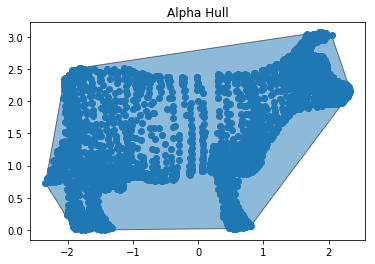

In [27]:
import math

edges = set()
edge_points = []
hullAlpha = 0.01

points = np.transpose([x2,y2])
tri = Delaunay(np.array(points))

def add_edge(i, j):
    """Add a line between the i-th and j-th points, if not in the list already"""
    if (i, j) in edges or (j, i) in edges:
        # already added
        return
    edges.add( (i, j) )
    edge_points.append(points[ [i, j] ])
    
# loop over triangles:
# ia, ib, ic = indices of corner points of the triangle
for ia, ib, ic in tri.vertices:
    pa = points[ia]
    pb = points[ib]
    pc = points[ic]

    # Lengths of sides of triangle
    a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
    b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
    c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)

    # Semiperimeter of triangle
    s = (a + b + c)/2.0

    # Area of triangle by Heron's formula
    area = math.sqrt(s*(s-a)*(s-b)*(s-c))

    circum_r = a*b*c/(4.0*area)

    # Here's the radius filter.
    if circum_r < 1.0/hullAlpha:
        add_edge(ia, ib)
        add_edge(ib, ic)
        add_edge(ic, ia)


# loop over triangles: 
# ia, ib, ic = indices of corner points of the triangle
for ia, ib, ic in tri.vertices:
    add_edge(ia, ib)
    add_edge(ib, ic)
    add_edge(ic, ia)

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from descartes import PolygonPatch
from shapely.geometry import MultiLineString
from shapely.ops import cascaded_union, polygonize

%matplotlib inline

m = MultiLineString(edge_points)
triangles = list(polygonize(m))

plt.figure()
plt.title("Alpha Hull")
plt.gca().add_patch(PolygonPatch(cascaded_union(triangles), alpha=0.5))
plt.gca().autoscale(tight=False)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()


In [28]:
np.shape(edge_points)

(8682, 2, 2)